In [ ]:
# locate your personal GD
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False
     

In [ ]:
cd /content/drive/MyDrive/Python_new/

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

[0]	validation_0-merror:0.34653	validation_1-merror:0.48043
[1]	validation_0-merror:0.29375	validation_1-merror:0.44687
[2]	validation_0-merror:0.28055	validation_1-merror:0.43060
[3]	validation_0-merror:0.27481	validation_1-merror:0.42501
[4]	validation_0-merror:0.27711	validation_1-merror:0.42450
[5]	validation_0-merror:0.27252	validation_1-merror:0.42044
[6]	validation_0-merror:0.27137	validation_1-merror:0.41942
[7]	validation_0-merror:0.26563	validation_1-merror:0.41535
[8]	validation_0-merror:0.26506	validation_1-merror:0.41434
[9]	validation_0-merror:0.26219	validation_1-merror:0.41688
[10]	validation_0-merror:0.26277	validation_1-merror:0.41637


/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-merror:0.26678	validation_1-merror:0.41332
[12]	validation_0-merror:0.26449	validation_1-merror:0.41434
[13]	validation_0-merror:0.26449	validation_1-merror:0.41281
[14]	validation_0-merror:0.26334	validation_1-merror:0.41281
[15]	validation_0-merror:0.26334	validation_1-merror:0.41078
[16]	validation_0-merror:0.26563	validation_1-merror:0.41281
[17]	validation_0-merror:0.26621	validation_1-merror:0.41230
[18]	validation_0-merror:0.26162	validation_1-merror:0.41688
[19]	validation_0-merror:0.25818	validation_1-merror:0.41840
[20]	validation_0-merror:0.25990	validation_1-merror:0.41993
[21]	validation_0-merror:0.25760	validation_1-merror:0.41993
[22]	validation_0-merror:0.25531	validation_1-merror:0.41637
[23]	validation_0-merror:0.25473	validation_1-merror:0.41586
[24]	validation_0-merror:0.25416	validation_1-merror:0.41383
[25]	validation_0-merror:0.25531	validation_1-merror:0.41484
[26]	validation_0-merror:0.25416	validation_1-merror:0.41332
[27]	validation_0-merror

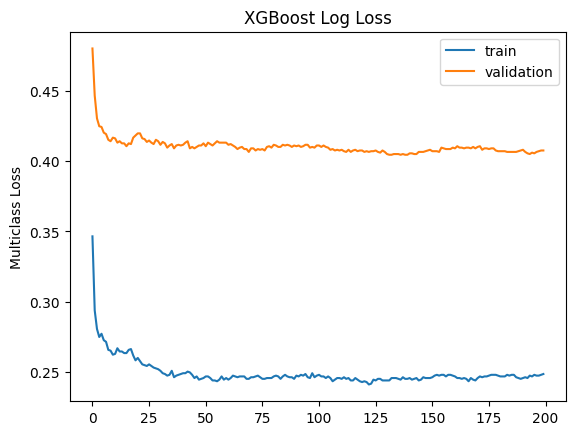

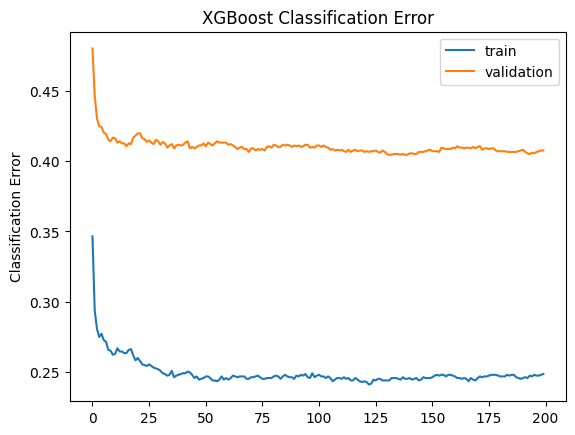

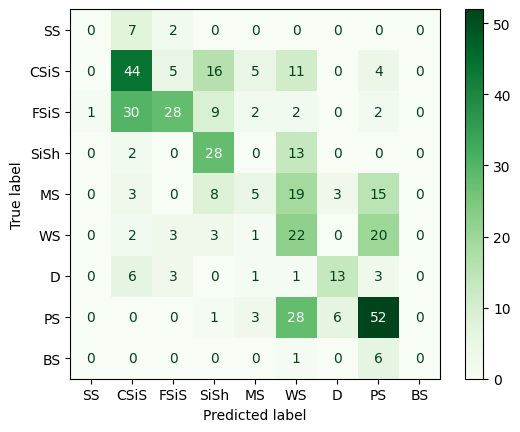

/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.47      0.52      0.49        85
           2       0.68      0.38      0.49        74
           3       0.43      0.65      0.52        43
           4       0.29      0.09      0.14        53
           5       0.23      0.43      0.30        51
           6       0.59      0.48      0.53        27
           7       0.51      0.58      0.54        90
           8       0.00      0.00      0.00         7

    accuracy                           0.44       439
   macro avg       0.36      0.35      0.33       439
weighted avg       0.45      0.44      0.42       439



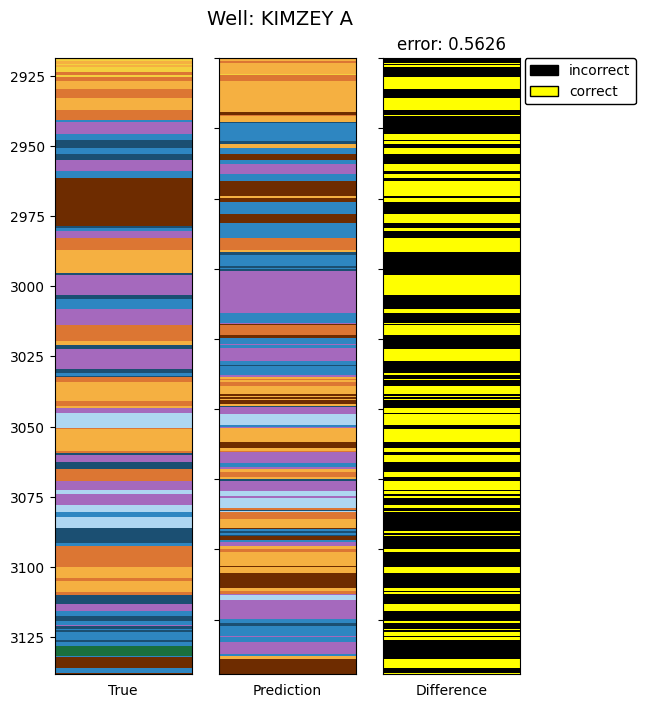

list true facies:  [0 1 2 3 4 5 6 7 8]
list prediction facies:  [0 1 2 3 4 5 6 7]
20


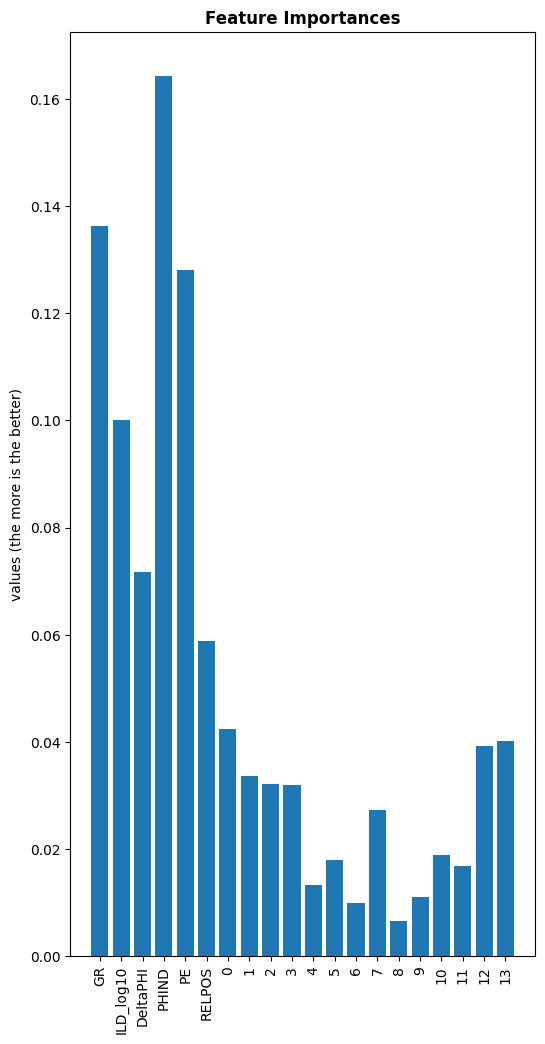

In [4]:
#-----------------------------------------------------------------------------------------#
import sys
sys.path.append('./Libs') 
import functions as F
#-----------------------------------------------------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
#-----------------------------------------------------------------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
#-----------------------------------------------------------------------------------------#

'''
step 1: input well-log data
'''

# data = pd.read_csv('/content/drive/MyDrive/Python_new/well_logs.csv')
# data = pd.read_csv('/content/drive/MyDrive/Python_new/well_logs.csv')
data = pd.read_csv('../reservoir_characteristics/datasets/well_logs.csv')
data = data.sort_values(by='Depth', ascending=True)

'''
step 2: encoder. XGBoost needs input labels as an interger with beginning with 0.
'''

le = LabelEncoder()
data['Facies'] = le.fit_transform(data['Facies'])
# print(sorted(data.Facies.unique()))

'''
step 3: preprocessing
        1. normalization
        2. missing values
'''

# NOTE normalizing
drop_cols = ['Facies', 'Formation', 'Well Name', 'Depth'] 
log_names = ['GR', 'ILD_log10',	'DeltaPHI', 'PHIND', 'PE', 'NMM_M', 'RELPOS']
nor_data = F.normalization(data, drop_cols, log_names)

# NOTE fill NaN with -999
nor_data.fillna(-999, inplace=True)
miss_data = F.missing_value(nor_data, 'nor_PE')
# print(miss_data)
# miss_data.to_csv ('../save_tabular/demo.csv', index = None, header=True) 

'''
step 4: apply encoder at missing values --> we will add one column contained binary data in which indicates data exist and the missing one. 
'''

en_data = F.encoder(miss_data)
#en_data.to_csv ('../reservoir_characteristics/save_tabular/demo_en_data.csv', index = None, header=True) 

# '''
# step 5: preparing data for training, validation, and testing. To prove that an inference (trained model) can predict unknown data accurately, geoscientists test the whole well to prove it. In comparison, general ML splits one well into several pieces of facies.
# '''

# NOTE select one well for testing

drop_col_2 = ['NM_M', 'nor_GR', 'nor_ILD_log10','nor_DeltaPHI',	'nor_PHIND',	'nor_PE', 'nor_NMM_M',	'nor_RELPOS', 'miss'] 
en_data = en_data.drop(drop_col_2, axis=1)

selected_well = 'KIMZEY A'
well_names_test = ['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
train = en_data.loc[en_data['Well Name'] != selected_well]
test  = en_data.loc[en_data['Well Name'] == selected_well]
# NOTE training data use some columns for training 
drop_cols = ['Facies', 'Formation', 'Well Name', 'Depth', 'formation_cat'] 
X = train.drop(drop_cols, axis=1) # select training feature 
y = train['Facies'] # select training label
X_test = test.drop(drop_cols, axis=1) # select testing feature
y_test = test['Facies'] # select testing label
# print(X)
# print(y)
# NOTE separate data for training and testing
X_train, X_val, y_train, y_val = train_test_split(X, y,
						  test_size=0.53,
						  random_state=True,
						  shuffle=y,
						  stratify=y)

# '''
# step 6: train data and plot learning curves.
# '''

# NOTE define parameters for fitting
clf_xgb = xgb.XGBClassifier(booster='gbtree',
                            #learning_rate=0.1,
                            learning_rate=1.5167330688076188e-05,
                            objective='multi:softprob',
                            subsample=0.5,
			    max_depth=12,
			    n_estimators=200,
			#     tree_method='gpu_hist',
			#     gpu_id=1,
                            verbosity=1)
# NOTE train
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=500,
            eval_metric='merror',
            eval_set=[(X_train, y_train), (X_val, y_val)])

# '''
# step 7: evaluate an inference on the test well --> ML never sees these data before (prediction).
# '''

# NOTE make predictions for the testing well
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# print(predictions)
# NOTE evaluate predictions
accuracy = accuracy_score(y_test, predictions)
# print(np.unique(y_test))
print(np.unique(predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# step 8: plot learning curves


# NOTE retrieve performance metrics
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# NOTE plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='train')
ax.plot(x_axis, results['validation_1']['merror'], label='validation')
ax.legend()
plt.ylabel('Multiclass Loss')
plt.title('XGBoost Log Loss')
# NOTE plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='train')
ax.plot(x_axis, results['validation_1']['merror'], label='validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()


# step 9: plot confusion matrices and custom evaluation 


# NOTE confusion matrices
lithofacies = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
cm(y_pred, en_data, selected_well, lithofacies, 'confusion_matrix')
print(metrics.classification_report(y_test, y_pred))
# NOTE custom evaluation
_, list_true_facies, list_pre_facies = F.custom_metric(test,
                                                        'Facies',
                                                        predictions,
                                                        'test')
print('list true facies: ', list_true_facies)
print('list prediction facies: ', list_pre_facies)


# # step 10: feature importances


# NOTE feature importance
plt.figure(figsize=(6, 12))
plt.bar(range(len(clf_xgb.feature_importances_)), clf_xgb.feature_importances_)
print(len(clf_xgb.feature_importances_))
drop_cols_2 = ['Facies', 'Formation', 'Well Name', 'Depth', 'formation_cat'] 
new_en_data = en_data.drop(drop_cols_2, axis=1) # select training feature 
labels = new_en_data.columns[:]
x = np.arange(0, len(labels), 1)
plt.xticks(x, labels, rotation=90)
plt.ylabel('values (the more is the better)')
plt.title('Feature Importances', fontweight='bold')
plt.show()